In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

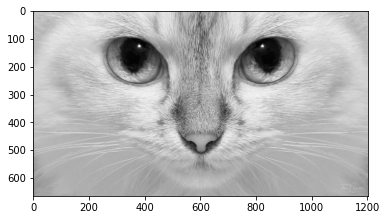

In [2]:
img = plt.imread('img/image.jpg')
imagegray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
np.resize(imagegray, (100, 100))
plt.figure(facecolor='white')
plt.imshow(imagegray, cmap='gray')

# 1. DEKOMPOSISI WAVELET 

In [3]:
lo_d = np.array([0.7071067811865476, 0.7071067811865476])
hi_d = np.array([-0.7071067811865476, 0.7071067811865476])
lo_r = np.array([0.7071067811865476, 0.7071067811865476])
hi_r = np.array([0.7071067811865476, -0.7071067811865476])

In [4]:
def padding(image, n_pad):
    n_pad = len(n_pad)-1
    padd = np.pad(image, [0, n_pad], 'constant')

    return padd

In [5]:
def konvoRow(padd, filter, image): # konvolusi baris citra
    row, col = image.shape
    konvo = np.zeros([row, col])

    for i in range (konvo.shape[0]):
        for j in range (konvo.shape[1]):
            for k in range (len(filter)):
                konvo [i,j] +=  (padd[i, j+k]*filter[k])
    
    return konvo

In [6]:
def konvoCol(padd, filter, image): # konvolusi kolom citra
    row, col = image.shape
    konvo = np.zeros([row, col])

    for i in range (konvo.shape[0]):
        for j in range (konvo.shape[1]):
            for k in range (len(filter)):
                konvo [i,j] +=  (padd[i+k, j]*filter[k])
    
    return konvo

In [7]:
def downRow (valueRow):
    row, col = valueRow.shape
    row = int(row/2)
    col = int(col)

    even = np.zeros([row, col])
    x = 0

    for i in range (row):
        for j in range (col):
            even [i, j] = valueRow[x, j]
        
        x = x + 2
    

    return even


In [8]:
def downCol (valueCol):
    row, col = valueCol.shape
    row = int(row)
    col = int(col/2)

    even = np.zeros([row, col])

    for i in range (row):
        x = 0
        for j in range (col):
            even [i, j] = valueCol[i, x]
            x = x + 2
    

    return even


In [9]:
def decomp(image, value1, value2):
    pad = padding (image, value1)
    konv = konvoRow (pad, value1, image)
    downSampling = downCol (konv)
    padd = padding (downSampling, value2)
    konv2 = konvoRow(padd, value2, downSampling)

    return downRow (konv2)

In [10]:
A = decomp(imagegray, lo_d, lo_d)
dH = decomp(imagegray, lo_d, hi_d)
dV = decomp(imagegray, hi_d, lo_d)
dD = decomp(imagegray, hi_d, hi_d)

In [11]:
def levelOne (LL, LH, HL, HH):
    rowOne = np.concatenate((LL, HL), axis=1)
    rowTwo = np.concatenate((LH, HH), axis=1)

    return np.concatenate((rowOne, rowTwo), axis=0)

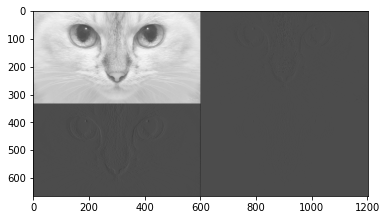

In [12]:
result = levelOne (A, dH, dV, dD)
plt.imshow(result, cmap='gray')